In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans
from scipy import stats
import seaborn as sns

In [19]:
usnews = pd.read_csv('usnews.data')
usnews = usnews.drop(['1Q math sat','3Q math sat','1Q verbal sat','3Q verbal sat','1Q act','3Q act'],axis=1)
display(usnews)
# No unit for monetory figures.

,fice,college name,state(postal code),pub(1)-pvt(2),avg math sat,avg verbal sat,avg combined sat,avg act,#applications received,#applicants accepted,...,board costs,additional fees,est. book costs,est. personal spending,%faculty with phd,%faculty with terminal degree,student/faculty,%alumni who donate,instructional expd. per student,graduation rate
0,1061,Alaska Pacific University,AK,2,490,482,972,20,193,146,...,2500,130,800,1500,76,72,11.9,2,10922,15
1,1063,University of Alaska at Fairbanks,AK,1,499,462,961,22,1852,1427,...,1790,155,650,2304,67,*,10.0,8,11935,*
2,1065,University of Alaska Southeast,AK,1,*,*,*,*,146,117,...,2250,34,500,1162,39,51,9.5,*,9584,39
3,11462,University of Alaska at Anchorage,AK,1,459,422,881,20,2065,1598,...,2520,114,580,1260,48,*,13.7,6,8046,*
4,1002,Alabama Agri. & Mech. Univ.,AL,1,*,*,*,17,2817,1920,...,1442,155,500,850,53,53,14.3,*,7043,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,3826,West Virginia State College,WV,1,*,*,*,18,1869,*,...,1700,50,750,750,38,38,19.2,4,3839,*
1298,3827,West Virginia University,WV,1,507,439,946,22,9630,7801,...,2026,*,*,*,83,86,13.4,*,8318,57
1299,3830,West Virginia Wesleyan College,WV,2,489,439,928,23,1566,1400,...,2025,*,450,1100,58,81,16.4,42,8080,67
1300,3831,Wheeling Jesuit College,WV,2,479,433,912,22,903,755,...,2445,*,600,600,66,71,14.1,27,7494,72


Question 1

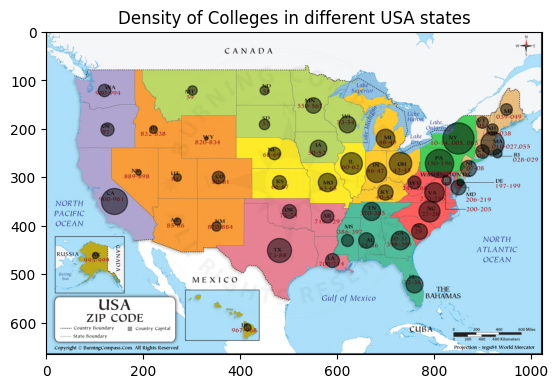

In [20]:
### Density of Colleges in different USA states ###
pc = list(usnews.iloc[:,2])
pc_distinct = list(set(pc))
pc_count = dict()
for i in pc_distinct:
    pc_count[i] = pc.count(i)

coords = {'NM':(350,400),'IL':(630,270),'NY':(850,220),'OR':(125,200),'KY':(700,330),'WI':(620,190),'HI':(415,610),'LA':(590,470),'NC':(790,370),'CO':(355,300),'MS':(620,430),'MO':(580,310),'DE':(855,310),'CT':(900,245),'CA':(140,350),'VT':(900,185),'TX':(480,450),'MA':(920,230),'OH':(730,270),'SC':(770,410),'NH':(920,200),'KS':(480,310),'ID':(220,200),'IA':(560,240),'TN':(670,370),'MN':(550,150),'MT':(300,120),'UT':(270,300),'ND':(450,120),'RI':(930,250),'SD':(450,190),'VA':(800,330),'MD':(850,320),'WY':(330,220),'MI':(700,220),'AL':(660,430),'AK':(100,460),'OK':(500,370),'NJ':(870,280),'AZ':(270,390),'NV':(190,290),'IN':(680,290),'WV':(760,310),'WA':(120,120),'AR':(580,380),'DC':(825,305),'GA':(730,430),'FL':(760,520),'PA':(810,270),'ME':(950,160),'NE':(470,250)}

img = io.imread('us-zip-code-map.jpg')
plt.imshow(img)
for i in list(pc_count.keys()):
    plt.scatter(coords[i][0],coords[i][1],color = 'black',alpha=0.5,s=pc_count[i]*5)
plt.title('Density of Colleges in different USA states')
plt.show()


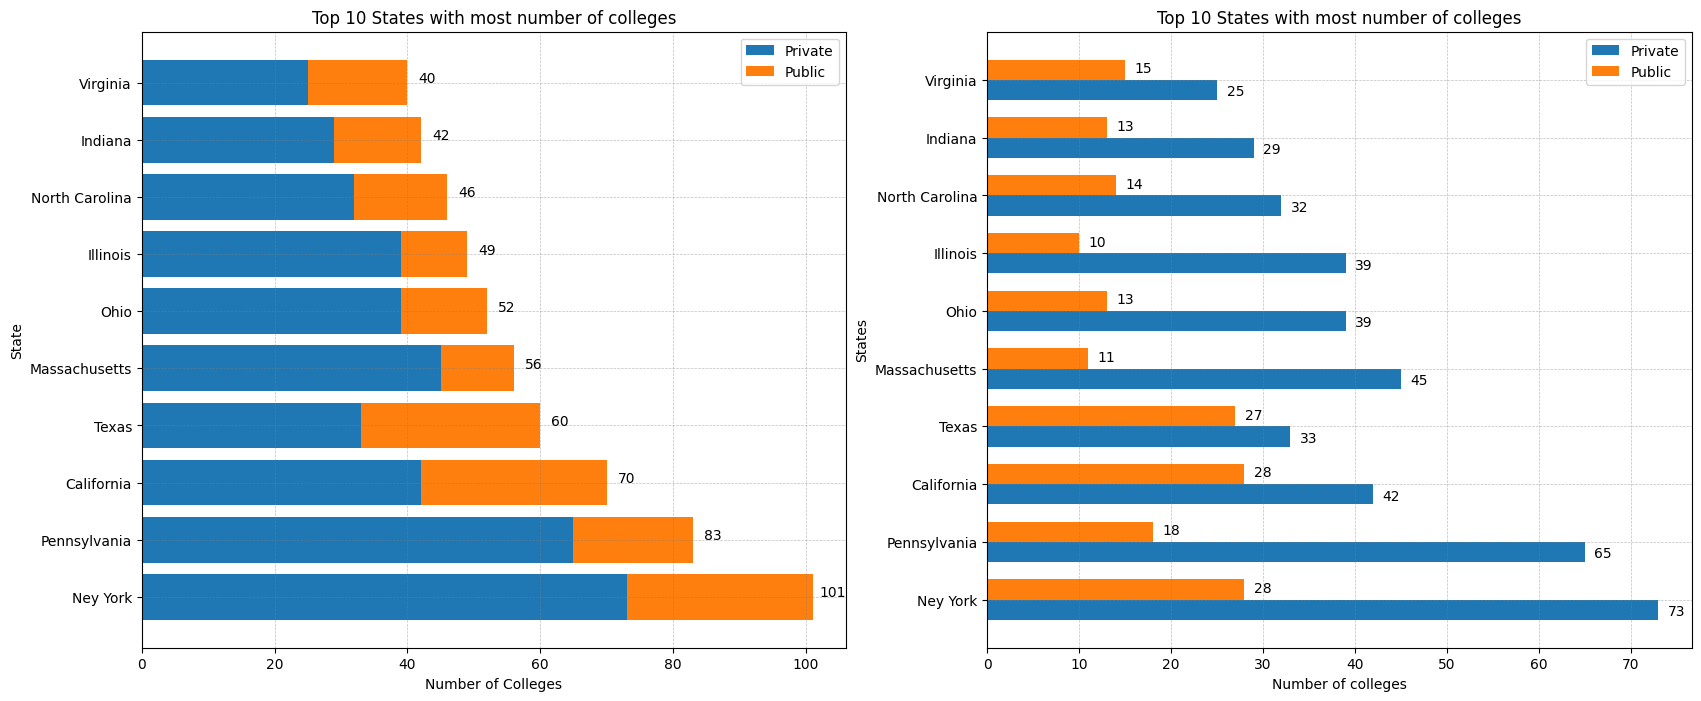

In [21]:
frequency = usnews['state(postal code)'].value_counts()
frequency = frequency.sort_values(ascending=False)
frequency = frequency.iloc[0:10]
postal_names = {'NY':'Ney York','PA':'Pennsylvania','CA':'California','TX':'Texas','MA':'Massachusetts','OH':'Ohio','IL':'Illinois','NC':'North Carolina','IN':'Indiana','VA':'Virginia'}
df1 = pd.DataFrame({"Names":postal_names.values(),'Frequency':frequency})
postal_codes = df1.index
arr_pub = []
arr_pvt = []

for i in range(len(postal_codes)):
    arr_pub.append(len(usnews[(usnews['state(postal code)']==postal_codes[i]) & (usnews['pub(1)-pvt(2)']==1)].index))
for i in range(len(postal_codes)):
    arr_pvt.append(len(usnews[(usnews['state(postal code)']==postal_codes[i]) & (usnews['pub(1)-pvt(2)']==2)].index))
df1['f_pub'] = arr_pub
df1['f_pvt'] = arr_pvt

fig,ax = plt.subplots(1,2,figsize=(20,8))

plt.subplot(1,2,1)
plt.barh(df1['Names'], df1['f_pvt'], left=0, label='Private')
plt.barh(df1['Names'], df1['f_pub'], left=df1['f_pvt'], label='Public')
for i, v in enumerate(frequency):
    plt.text(v+3, i, str(v), ha='center')
plt.title('Top 10 States with most number of colleges')
plt.xlabel('Number of Colleges')
plt.ylabel('State')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()

plt.subplot(1,2,2)
bar_height = 0.35
plt.barh(df1['Names'], df1['f_pvt'], height=bar_height, label='Private')
plt.barh(np.arange(len(df1['Names'])) + bar_height,df1['f_pub'], height=bar_height, label='Public')
for i, v in enumerate(arr_pub):
    plt.text(v+2, i+0.3, str(v), ha='center')
for i, v in enumerate(arr_pvt):
    plt.text(v+2, i-0.1, str(v), ha='center')
plt.title('Top 10 States with most number of colleges')
plt.xlabel('Number of colleges')
plt.ylabel('States')
plt.yticks(np.arange(len(df1['Names'])) + bar_height / 2)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()
plt.show()

Question 2

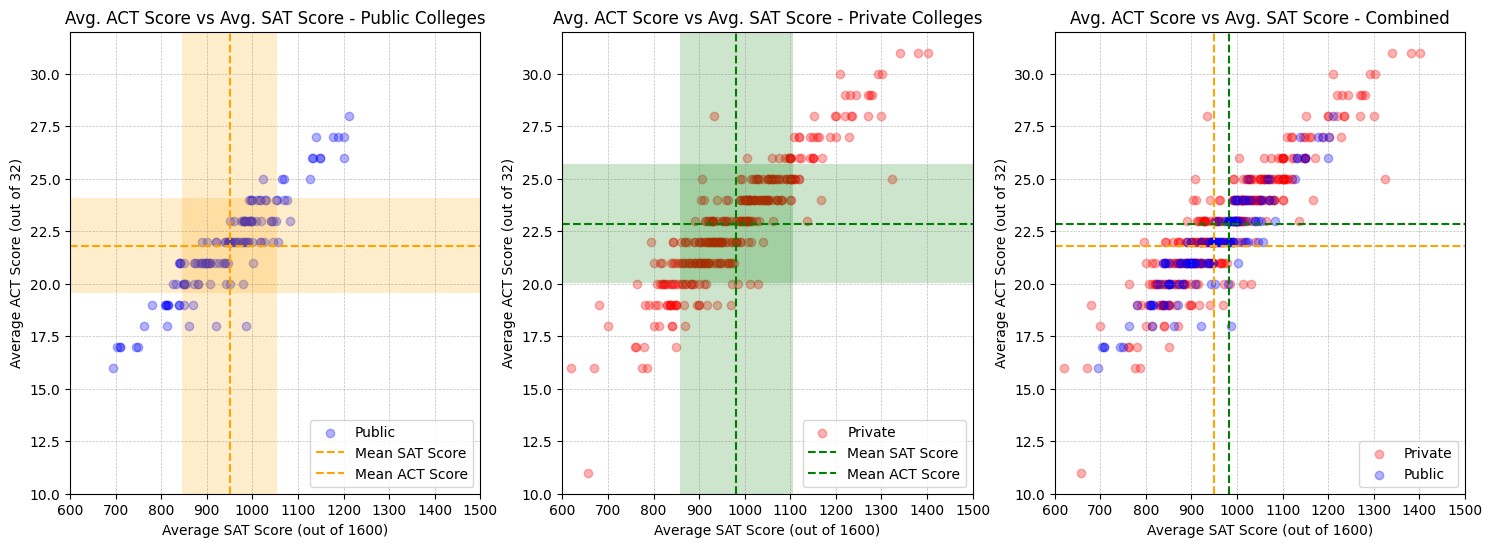

In [22]:
X = pd.DataFrame({'fice':usnews['fice'],'pub(1)-pvt(2)':usnews['pub(1)-pvt(2)'],'avg combined sat':usnews['avg combined sat'],'avg act':usnews['avg act']})
X = X[(X['avg combined sat'] != '*') & (X['avg act'] != '*')]
X['avg act'] = X['avg act'].astype('int64')
X['avg combined sat'] = X['avg combined sat'].astype('int64')

X_pub = X[(X['pub(1)-pvt(2)']==1)]
X_pvt = X[(X['pub(1)-pvt(2)']==2)]

fig,ax = plt.subplots(1,3,figsize=(18,6),sharex=True)

plt.subplot(1,3,1)
plt.ylim(10,32)
plt.xlim(600,1500)
plt.scatter(X_pub['avg combined sat'],X_pub['avg act'],color = 'blue',alpha=0.3)
plt.title('Avg. ACT Score vs Avg. SAT Score - Public Colleges')
plt.xlabel('Average SAT Score (out of 1600)')
plt.ylabel('Average ACT Score (out of 32)')
plt.vlines(950.090278,10,32,color = 'orange',linestyles='dashed')
plt.hlines(21.812500,600,1500,color = 'orange',linestyles='dashed')
plt.axvspan(950.090278-103.488921,950.090278+103.488921, facecolor='orange', alpha=0.2)
plt.axhspan(21.812500-2.268571,21.812500+2.268571, facecolor='orange', alpha=0.2)
plt.legend(['Public','Mean SAT Score','Mean ACT Score'],loc='lower right')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

plt.subplot(1,3,2)
plt.ylim(10,32)
plt.scatter(X_pvt['avg combined sat'],X_pvt['avg act'],color = 'red',alpha=0.3)
plt.title('Avg. ACT Score vs Avg. SAT Score - Private Colleges')
plt.xlabel('Average SAT Score (out of 1600)')
plt.ylabel('Average ACT Score (out of 32)')
plt.vlines(981.784884,10,32,color = 'green',linestyles='dashed')
plt.hlines(22.854651,600,1500,color = 'green',linestyles='dashed')
plt.axvspan(981.784884-124.239495,981.784884+124.239495, facecolor='green', alpha=0.2)
plt.axhspan(22.854651-2.840119,22.854651+2.840119, facecolor='green', alpha=0.2)
plt.legend(['Private','Mean SAT Score','Mean ACT Score'],loc='lower right')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)


plt.subplot(1,3,3)
plt.ylim(10,32)
plt.scatter(X_pvt['avg combined sat'],X_pvt['avg act'],color = 'red',alpha=0.3)
plt.scatter(X_pub['avg combined sat'],X_pub['avg act'],color = 'blue',alpha=0.3)
plt.title('Avg. ACT Score vs Avg. SAT Score - Combined')
plt.xlabel('Average SAT Score (out of 1600)')
plt.ylabel('Average ACT Score (out of 32)')
plt.vlines(950.090278,10,32,color = 'orange',linestyles='dashed')
plt.hlines(21.812500,600,1500,color = 'orange',linestyles='dashed')
plt.vlines(981.784884,10,32,color = 'green',linestyles='dashed')
plt.hlines(22.854651,600,1500,color = 'green',linestyles='dashed')
plt.legend(['Private','Public'],loc='lower right')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

# print('Public')
# print(X_pub.describe())
# print('Private')
# print(X_pvt.describe())


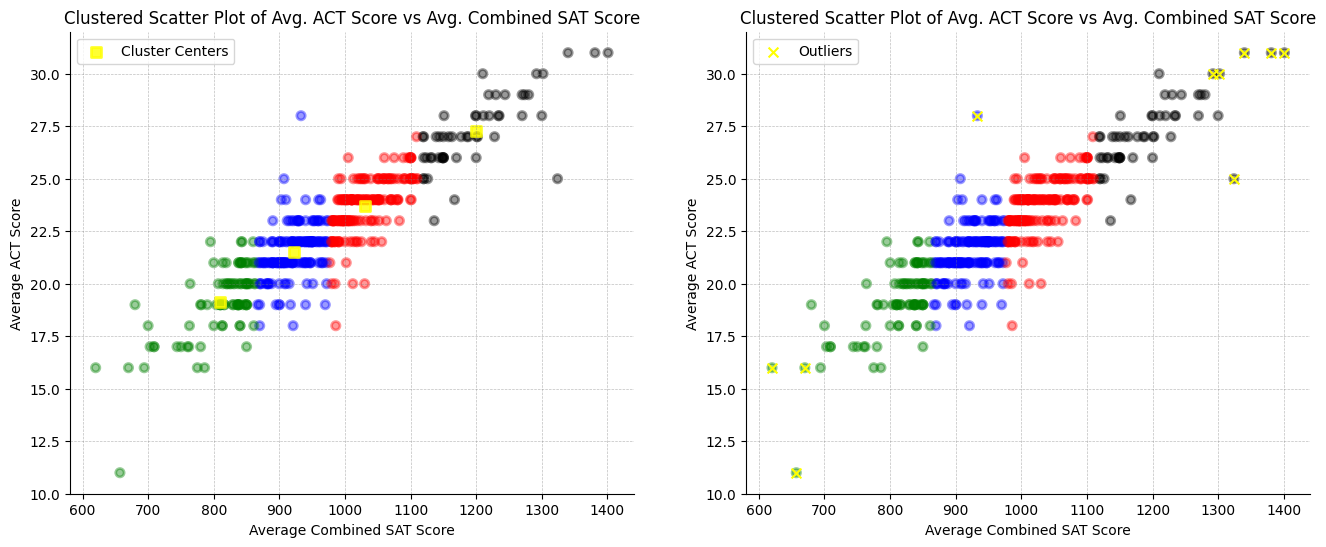

,college name,state(postal code),avg combined sat,avg act,Cluster,Z_ACS,Z_AA
79,Pomona College,CA,1340,31,2,3.084948,3.106598
97,Stanford University,CA,1401,31,2,3.596913,3.106598
455,Massachusetts Institute of Technology,MA,1381,31,2,3.429055,3.106598
495,Johns Hopkins University,MD,1292,30,2,2.682090,2.739078
654,Duke University,NC,1302,30,2,2.766019,2.739078
1069,Voorhees College,SC,670,16,3,-2.538276,-2.406202
1154,Jarvis Christian College,TX,657,11,3,-2.647383,-4.243802
1155,Texas College,TX,620,16,3,-2.957920,-2.406202


,college name,state(postal code),avg combined sat,avg act,Cluster,Z_ACS,Z_AA
432,Amherst College,MA,1324,25,2,2.950662,0.901478


,college name,state(postal code),avg combined sat,avg act,Cluster,Z_ACS,Z_AA
846,Utica College of Syracuse University,NY,933,28,1,-0.330951,2.004038


In [23]:
X = pd.DataFrame({'college name':usnews['college name'],'state(postal code)':usnews['state(postal code)'],'avg combined sat':usnews['avg combined sat'],'avg act':usnews['avg act']})
X = X[(X['avg combined sat'] != '*') & (X['avg act'] != '*')]
X['avg act'] = X['avg act'].astype('int64')
X['avg combined sat'] = X['avg combined sat'].astype('int64')

kmeans = KMeans(n_clusters=4,n_init='auto')
kmeans.fit(X.iloc[0:,2:])
labels = kmeans.predict(X.iloc[0:,2:])
X['Cluster'] = labels
colors = ['red', 'blue','black','green']
cluster_centers = kmeans.cluster_centers_

acs = X.iloc[:,2]
aa = X.iloc[:,3]
X['Z_ACS'] = stats.zscore(acs)
X['Z_AA'] = stats.zscore(aa)
threshold = 2.4

outliers = X[((X['Z_ACS']>threshold) | (X['Z_ACS']<-threshold)) & ((X['Z_AA']>threshold) | (X['Z_AA']<-threshold))]
p = X[(X['avg combined sat']>1300) & (X['avg act']<25.5)]
q = X[(X['avg combined sat']<1000) & (X['avg act']>27.5)]

fig, ax = plt.subplots(1,2,figsize=(16, 6))
plt.subplot(1,2,1)
plt.scatter(acs,aa, c=[colors[label] for label in labels],alpha=0.4,linewidths=2)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c='yellow',marker='s',alpha=0.8,linewidths=2,s=50,label='Cluster Centers')
plt.xlabel('Average Combined SAT Score')
plt.ylabel('Average ACT Score')
plt.title('Clustered Scatter Plot of Avg. ACT Score vs Avg. Combined SAT Score')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(acs,aa, c=[colors[label] for label in labels],alpha=0.4,linewidths=2)
plt.scatter(outliers.iloc[:,2],outliers.iloc[:,3],marker="x",color='yellow',s=50,label='Outliers')
plt.scatter(1324,25,marker="x",color='yellow',s=50)
plt.scatter(933,28,marker="x",color='yellow',s=50)
plt.xlabel('Average Combined SAT Score')
plt.ylabel('Average ACT Score')
plt.title('Clustered Scatter Plot of Avg. ACT Score vs Avg. Combined SAT Score')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()
plt.show()

display(outliers)
display(p,q)

Question 3

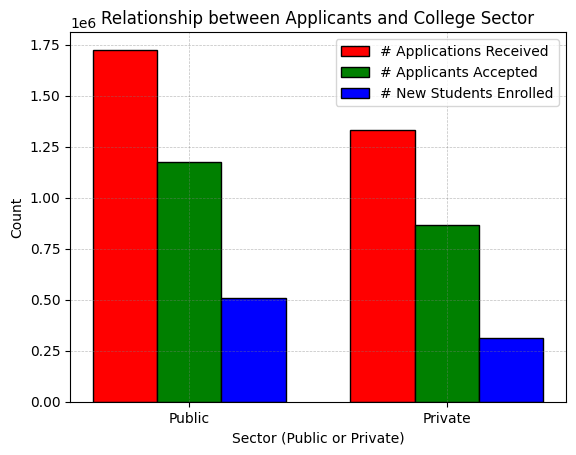

In [60]:
Z = pd.DataFrame({'college name':usnews['college name'],'pub(1)-pvt(2)':usnews['pub(1)-pvt(2)'],'#applications received':usnews['#applications received'],'#applicants accepted':usnews['#applicants accepted'],'#new students enrolled':usnews['#new students enrolled'],'%new students (top 10% hs class)':usnews['%new students (top 10% hs class)'],'%new students (top 25% hs class)':usnews['%new students (top 25% hs class)']})
Z = Z[(Z['#applications received'] != '*') & (Z['#applicants accepted'] != '*') & (Z['#new students enrolled'] != '*') & (Z['%new students (top 10% hs class)'] != '*') & (Z['%new students (top 25% hs class)'] != '*')]
Z['#applications received'] = Z['#applications received'].astype('int64')
Z['#applicants accepted'] = Z['#applicants accepted'].astype('int64')
Z['#new students enrolled'] = Z['#new students enrolled'].astype('int64')
Z['%new students (top 10% hs class)'] = Z['%new students (top 10% hs class)'].astype('int64')
Z['%new students (top 25% hs class)'] = Z['%new students (top 25% hs class)'].astype('int64')


A = Z.groupby('pub(1)-pvt(2)')[['#applications received','#applicants accepted','#new students enrolled']].sum()

a = A.iloc[:,0]
b = A.iloc[:,1]
c = A.iloc[:,2]
  
n=2
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, a, color = 'r',
        width = width, edgecolor = 'black',
        label='# Applications Received')
plt.bar(r + width, b, color = 'g',
        width = width, edgecolor = 'black',
        label='# Applicants Accepted')
plt.bar(r + 2*width, c, color = 'b',
        width = width, edgecolor = 'black',
        label='# New Students Enrolled')
  
plt.xlabel("Sector (Public or Private)")
plt.ylabel("Count")
plt.title("Relationship between Applicants and College Sector")
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.xticks(r + width,['Public','Private'])
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()
  
plt.show()

Question 4

In [27]:
B = pd.DataFrame({'college name':usnews['college name'],'pub(1)-pvt(2)':usnews['pub(1)-pvt(2)'],'in-state tuition':usnews['in-state tuition'],'out-of-state tuition':usnews['out-of-state tuition'],'room-board costs':usnews['room-board costs'],'additional fees':usnews['additional fees'],'est. book costs':usnews['est. book costs'],'est. personal spending':usnews['est. personal spending'],'instructional expd. per student':usnews['instructional expd. per student']})
B = B[(B['in-state tuition'] != '*') & (B['out-of-state tuition'] != '*') & (B['room-board costs'] != '*') & (B['additional fees'] != '*') & (B['est. book costs'] != '*') & (B['est. personal spending'] != '*') & (B['instructional expd. per student'] != '*')]
B['in-state tuition'] = B['in-state tuition'].astype('int64')
B['out-of-state tuition'] = B['out-of-state tuition'].astype('int64')
B['room-board costs'] = B['room-board costs'].astype('int64')
B['additional fees'] = B['additional fees'].astype('int64')
B['est. book costs'] = B['est. book costs'].astype('int64')
B['est. personal spending'] = B['est. personal spending'].astype('int64')
B['instructional expd. per student'] = B['instructional expd. per student'].astype('int64')
B = B.assign(total = B['in-state tuition'] + B['out-of-state tuition'] + B['room-board costs'] + B['additional fees'] + B['est. book costs'] + B['est. personal spending'])
C = B.groupby(by='pub(1)-pvt(2)')[['in-state tuition','out-of-state tuition','room-board costs','additional fees','est. book costs','est. personal spending','total','instructional expd. per student']].sum()
C = C.assign(avg_costs = C['total']/847)
C = C.assign(avg_institute_spending = C['instructional expd. per student']/847)
display(C)
B.describe()

,in-state tuition,out-of-state tuition,room-board costs,additional fees,est. book costs,est. personal spending,total,instructional expd. per student,avg_costs,avg_institute_spending
pub(1)-pvt(2),,,,,,,,,,
1,575178,1610045,932138,128128,140655,409261,3795405,1817939,4480.997639,2146.327037
2,6796529,6807395,2713674,180025,325515,735619,17558757,6115468,20730.527745,7220.151122


,pub(1)-pvt(2),in-state tuition,out-of-state tuition,room-board costs,additional fees,est. book costs,est. personal spending,instructional expd. per student,total
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,1.698937,8703.314050,9937.945691,4304.382527,363.817001,550.377804,1351.688312,9366.478158,25211.525384
std,0.458991,5415.504116,4242.416761,1175.194415,335.187800,171.608215,700.092630,5137.699233,10138.679948
min,1.000000,480.000000,1044.000000,1306.000000,9.000000,90.000000,250.000000,2033.000000,5106.000000
25%,1.000000,2967.000000,6600.000000,3477.000000,135.000000,470.000000,860.000000,6439.000000,16282.500000
50%,2.000000,9000.000000,9400.000000,4180.000000,270.000000,500.000000,1200.000000,8116.000000,24486.000000
75%,2.000000,12462.000000,12500.000000,5025.000000,470.000000,600.000000,1700.000000,10537.000000,32028.500000
max,2.000000,20655.000000,20655.000000,8124.000000,3247.000000,2340.000000,6800.000000,62469.000000,49100.000000


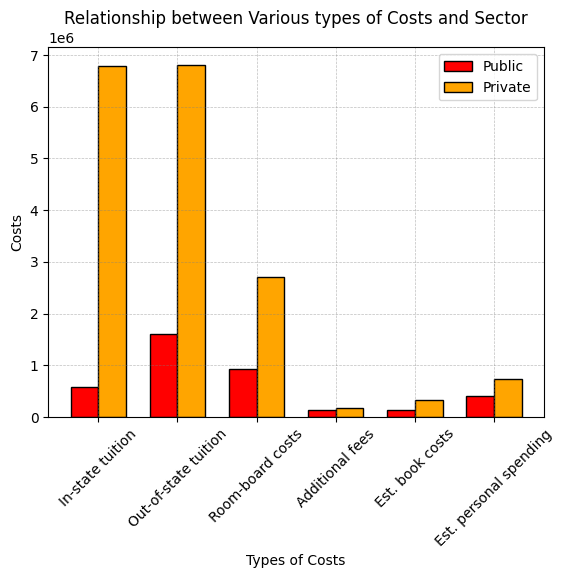

In [29]:
a = C.iloc[0,:6]
b = C.iloc[1,:6]

n=6
r = np.arange(n)
width = 0.35
  
  
plt.bar(r, a, color = 'r',width = width, edgecolor = 'black',label='Public')
plt.bar(r + width, b, color = 'orange',width = width, edgecolor = 'black',label='Private')
  
plt.xlabel("Types of Costs")
plt.ylabel("Costs")
plt.title("Relationship between Various types of Costs and Sector")
plt.xticks(r+width/2,['In-state tuition','Out-of-state tuition','Room-board costs','Additional fees','Est. book costs','Est. personal spending'],rotation=45)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()
  
plt.show()

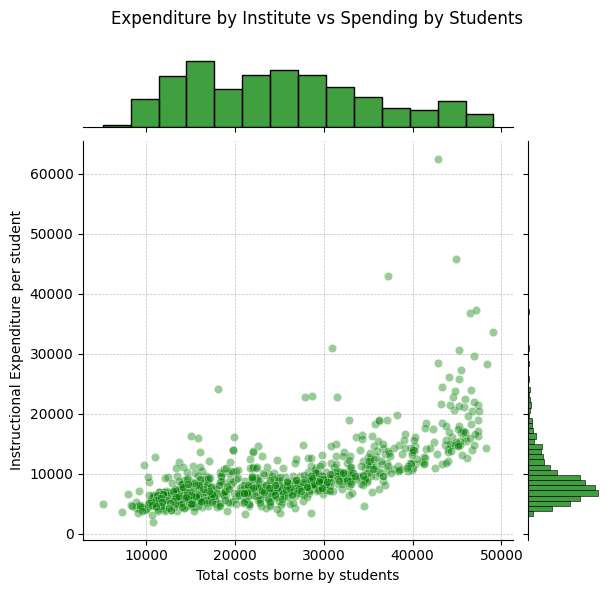

,college name,pub(1)-pvt(2),in-state tuition,out-of-state tuition,room-board costs,additional fees,est. book costs,est. personal spending,instructional expd. per student,total
54,California Institute of Technology,2,16695,16695,5051,210,735,3466,62469,42852
613,Washington University,2,18350,18350,5775,184,768,1512,45702,44939
916,Antioch University,2,15476,15476,3336,1404,400,1100,42926,37192
451,Harvard University,2,18485,18485,6410,1335,500,1920,37219,47135
320,University of Chicago,2,18930,18930,6380,486,500,1254,36854,46480
455,Massachusetts Institute of Technology,2,20100,20100,5975,600,725,1600,33541,49100
114,University of Judaism,2,10560,10560,6200,428,825,2325,31012,30898
781,Columbia University,2,18624,18624,6664,486,550,300,30639,45248
715,Dartmouth College,2,19545,19545,6070,105,550,1100,29619,46915
209,Emory University,2,17600,17600,6000,230,600,870,28457,42900


In [61]:
sns.jointplot(y=B['instructional expd. per student'],x=B['total'],alpha=0.4,color='g')
plt.xlabel('Total costs borne by students')
plt.ylabel('Instructional Expenditure per student')
plt.suptitle('Expenditure by Institute vs Spending by Students')
plt.subplots_adjust(top=0.9)
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
out = B[(B['instructional expd. per student'] > 10537 + (10537-6439)*1.5)].sort_values(by='instructional expd. per student',ascending=False)
plt.show()
display(out.head(15))

Question 5

,college name,pub(1)-pvt(2),%faculty with phd,student/faculty,%alumni who donate,instructional expd. per student,graduation rate
0,Alaska Pacific University,2,76,11.9,2,10922,15
6,University of Montevallo,1,72,18.9,8,5883,51
8,Auburn University-Main Campus,1,85,16.7,18,6642,69
9,Birmingham-Southern College,2,74,14.0,34,8649,72
10,University of North Alabama,1,62,19.4,5,4944,76
...,...,...,...,...,...,...,...
1293,Salem-Teikyo University,2,46,13.0,9,8946,98
1295,West Liberty State College,1,33,16.3,10,4249,60
1299,West Virginia Wesleyan College,2,58,16.4,42,8080,67
1300,Wheeling Jesuit College,2,66,14.1,27,7494,72


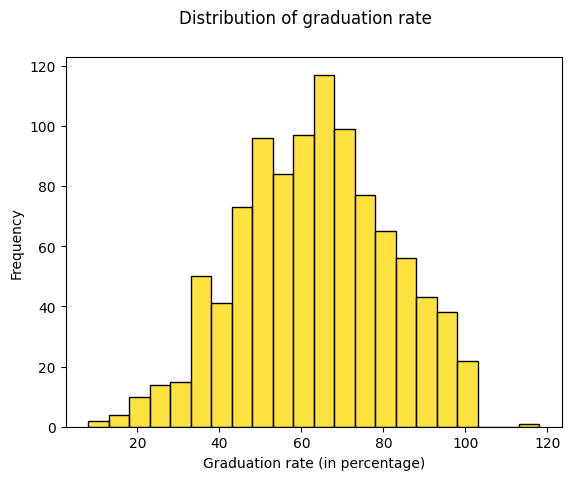

,college name,pub(1)-pvt(2),%faculty with phd,student/faculty,%alumni who donate,instructional expd. per student,graduation rate
771,Cazenovia College,2,22,14.3,20,7697,118


,pub(1)-pvt(2),%faculty with phd,student/faculty,%alumni who donate,instructional expd. per student,graduation rate
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,1.669990,71.484546,14.422034,21.256231,9377.538385,62.688933
std,0.470451,16.549403,4.118509,12.724595,5373.495071,18.395330
min,1.000000,8.000000,2.500000,0.000000,3186.000000,8.000000
25%,1.000000,61.000000,11.600000,11.000000,6416.500000,50.000000
50%,2.000000,74.000000,13.900000,19.000000,8055.000000,63.000000
75%,2.000000,84.000000,17.100000,30.000000,10506.500000,76.000000
max,2.000000,103.000000,39.800000,81.000000,62469.000000,100.000000


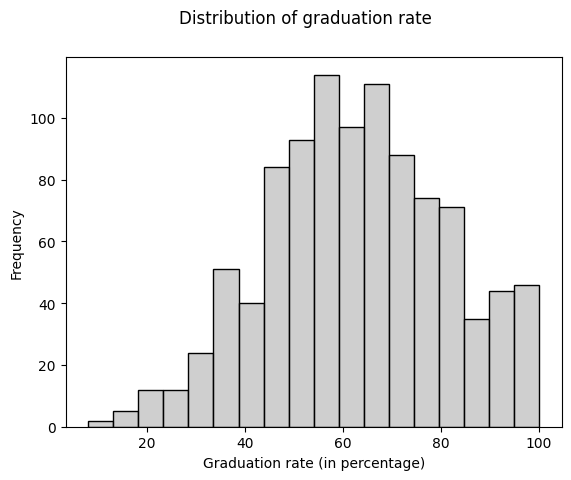

In [62]:
C= pd.DataFrame({'college name':usnews['college name'],'pub(1)-pvt(2)':usnews['pub(1)-pvt(2)'],'%faculty with phd':usnews['%faculty with phd'],'student/faculty':usnews['student/faculty'],'%alumni who donate':usnews['%alumni who donate'],'instructional expd. per student':usnews['instructional expd. per student'],'graduation rate':usnews['graduation rate']})
C = C[(C['%faculty with phd'] != '*') & (C['student/faculty'] != '*') & (C['%alumni who donate'] != '*') & (C['instructional expd. per student'] != '*') & (C['graduation rate'] != '*')]
C['%faculty with phd'] = C['%faculty with phd'].astype('int64')
C['student/faculty'] = C['student/faculty'].astype('float')
C['%alumni who donate'] = C['%alumni who donate'].astype('int64')
C['instructional expd. per student'] = C['instructional expd. per student'].astype('int64')
C['graduation rate'] = C['graduation rate'].astype('int64')
display(C)
C.describe()

sns.histplot(C['graduation rate'],color='gold')
plt.suptitle('Distribution of graduation rate')
plt.xlabel('Graduation rate (in percentage)')
plt.ylabel('Frequency')
plt.show()

Q = C[(C['graduation rate']>100)]
display(Q)
C = C.drop([771])
display(C.describe())
sns.histplot(C['graduation rate'],color='silver')
plt.suptitle('Distribution of graduation rate')
plt.xlabel('Graduation rate (in percentage)')
plt.ylabel('Frequency')
plt.show()